In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LassoCV


In [26]:
df_train = pd.read_csv('../data/processed/log_trans/data_train.csv')
df_val = pd.read_csv('../data/processed/log_trans/data_val.csv')
df_test = pd.read_csv('../data/processed/log_trans/data_test.csv')

In [27]:
X_train, y_train = df_train.drop('Y', axis = 1), pd.DataFrame(df_train['Y'])
X_val, y_val = df_val.drop('Y', axis = 1), pd.DataFrame(df_val['Y'])
X_test, y_test = df_test.drop('Y', axis = 1), pd.DataFrame(df_test['Y'])

## Lasso Regression

In [28]:
df_train

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295
0,4.240320,41,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,4,14,29,3.314436,3.791410,4.092405,3.314436,1,3,6
1,3.739050,45,0.000000,0.000000,0.000000,0.000000,0,0,0,2.104828,...,6,16,40,4.026206,4.503300,4.835257,4.026206,2,6,13
2,3.824952,53,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,12,18,57,3.743886,4.302030,4.567319,3.824952,1,3,6
3,4.301052,20000,4.301052,4.301052,4.301052,4.301052,20000,20000,20000,4.301052,...,20000,20000,20000,4.301052,4.301052,4.301052,4.301052,20000,20000,20000
4,4.231919,41,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,5,15,36,4.066821,4.535422,4.829050,4.058327,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,3.301247,45,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,5,16,32,0.000000,0.000000,0.000000,0.000000,0,0,0
5996,3.834294,42,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,2,10,20,3.929312,4.299106,4.564770,3.822031,1,3,6
5997,3.352954,27,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,8,26,54,3.442119,3.858934,4.227393,3.381927,2,4,7
5998,3.821314,28,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,...,12,28,49,4.293405,4.685017,5.002353,4.207914,5,10,16


In [29]:
lasso_model = Lasso().fit(X_train, y_train)

In [80]:
y_pred_lasso = lasso_model.predict(X_val)
print('basic model')
print(f'MSE: {mean_squared_error(y_val,y_pred_lasso)}')
print(f'r2_score: {r2_score(y_val, y_pred_lasso)}')

basic model
MSE: 0.10167173736683496
r2_score: -0.010660390642654782


In [31]:
lasso_cv_model = LassoCV(alphas = np.linspace(0,1,1001), max_iter = 10000, cv = 5).fit(X_train,y_train)

In [57]:
N = lasso_cv_model.alpha_
N

0.0

In [78]:
lasso_tuned = Lasso().set_params(alpha = N).fit(X_train,y_train)

In [81]:
y_pred_lasso_tuned = lasso_tuned.predict(X_val)
print('tuned model')
print(f'MSE: {mean_squared_error(y_val,y_pred_lasso_tuned)}')
print(f'r2_score: {r2_score(y_val, y_pred_lasso_tuned)}')

tuned model
MSE: 0.07709785278561654
r2_score: 0.23361449275835522


In [60]:
lasso_feature = pd.DataFrame(list(lasso_tuned.coef_), columns = ['coef'])
lasso_feature.index = list(X_train.columns)
lasso_feature.sort_values(by = 'coef', inplace = True)


[]

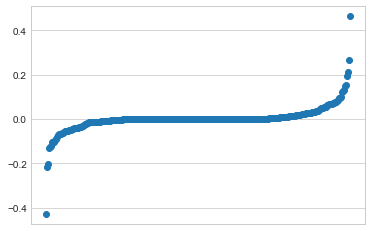

In [61]:
fig, ax = plt.subplots()
ax.scatter(x = lasso_feature.index, y = lasso_feature.coef)
ax.set_xticks([])


In [64]:
X_train[X_train.columns.intersection(list(lasso_feature[lasso_feature.coef != 0].index))].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295
0,41,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,...,4,14,29,3.314436,3.791410,4.092405,3.314436,1,3,6
1,45,0.000000,0.000000,0.000000,0.000000,0,0,0,2.104828,2.275772,...,6,16,40,4.026206,4.503300,4.835257,4.026206,2,6,13
2,53,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,...,12,18,57,3.743886,4.302030,4.567319,3.824952,1,3,6
3,20000,4.301052,4.301052,4.301052,4.301052,20000,20000,20000,4.301052,4.301052,...,20000,20000,20000,4.301052,4.301052,4.301052,4.301052,20000,20000,20000
4,41,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,2.043755,...,5,15,36,4.066821,4.535422,4.829050,4.058327,1,3,7


In [141]:
MSE = []
alpha = []
r2 = []
nfeat = []
model_score= []
n = 300
i = 0
while n > 10:
    model = Lasso(alpha = i).fit(X_train, y_train)
    y_pred = model.predict(X_val)
    MSE.append(mean_squared_error(y_val,y_pred))
    alpha.append(i)
    r2.append(r2_score(y_val, y_pred))
    model_score.append(model.score(X_val, y_val))
    nfeat.append(sum(model.coef_ != 0))
    i+=0.01
    print(i)
    n = nfeat[-1]
    
    

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

In [142]:
evaluation = pd.DataFrame(list(zip(MSE, r2, model_score,nfeat)), index = [alpha], columns = ['MSE', 'r2_score', 'model_score','nfeat'])
evaluation.nfeat = evaluation.nfeat/100

<AxesSubplot:>

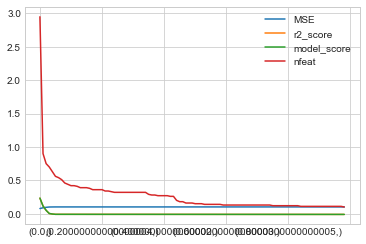

In [143]:
evaluation.plot()